# note- using the iris dataset, it has 4 features and 3 classes- setosa, versicolor and virginia

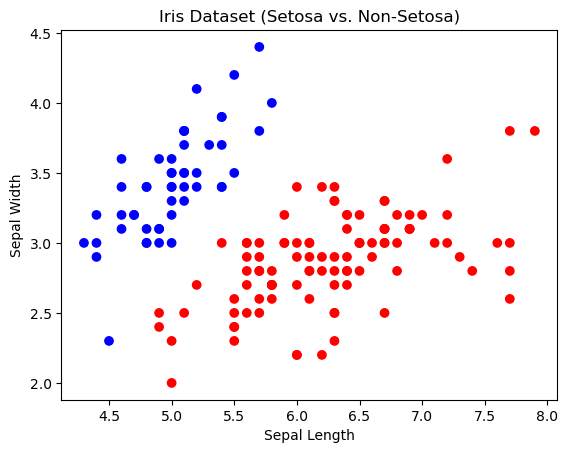

In [4]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

data = load_iris()
X = data.data[:, :2]   #using 2 features as plotting 4d is not possible on 2d
y = data.target
y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset (Setosa vs. Non-Setosa)')   #only setosa is linearly seperable
plt.show()

In [5]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


# training the model

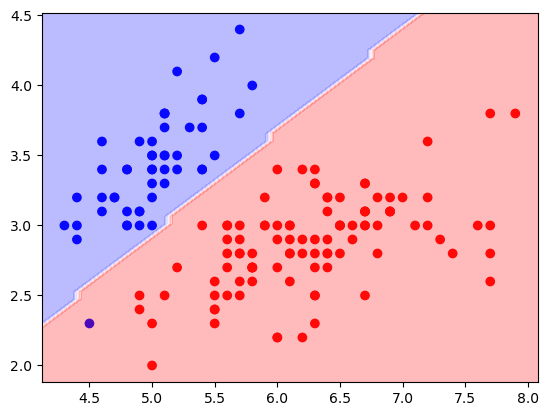

In [6]:
svm = SVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X, y)

def plot_decision_boundary(X, y, model):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    Z = model.predict(xy).reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.show()

plot_decision_boundary(X, y, svm)


# testing

In [7]:
new_samples = np.array([[0, 0], [4, 4]])
predictions = svm.predict(new_samples)
print(predictions)


[-1. -1.]


In [9]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(X, y)

print(clf.predict(new_samples))


[-1 -1]


# scikit learn

LINEAR MODEL

In [13]:


# Import necessary libraries
from sklearn import svm
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
# We only take the first two
# features for simplicity
X = iris.data[:, :2]
y = iris.target

# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Predict using the SVM model
predictions = model.predict(X)

# Evaluate the predictions
accuracy = model.score(X, y)
print("Accuracy of SVM:", accuracy)


Accuracy of SVM: 0.82


# 

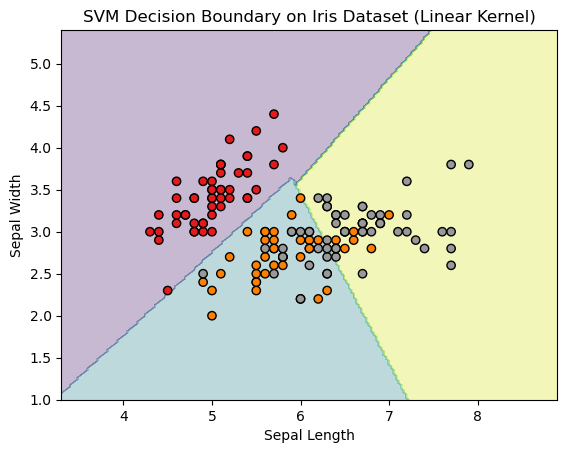

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features
y = iris.target

# Fit SVM model with linear kernel
model = svm.SVC(kernel='linear')
model.fit(X, y)

# Create a mesh grid for plotting
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Predict on the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("SVM Decision Boundary on Iris Dataset (Linear Kernel)")
plt.show()


There is overlap as Versicolor and Virginica are not linearly separable

# SVM with feature scaling - standardization

In [14]:
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features for better separation
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (recommended for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print("Accuracy of SVM on test set:", accuracy)


Accuracy of SVM on test set: 0.9777777777777777


# visualising the data

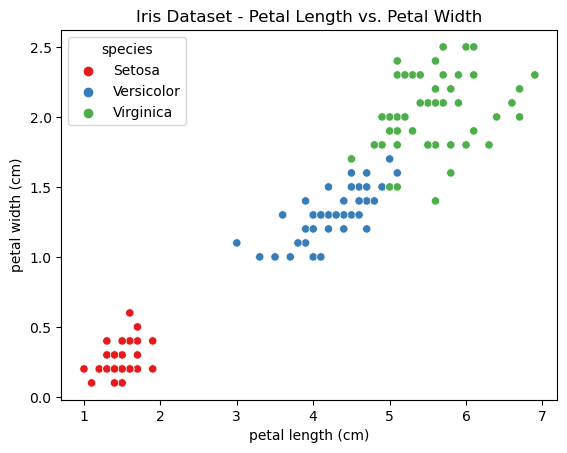

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert to DataFrame for easy visualization
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Rename species labels for readability
species_map = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df['species'] = df['species'].map(species_map)

# Scatter plot of Petal Length vs. Petal Width
sns.scatterplot(x=df['petal length (cm)'], y=df['petal width (cm)'], hue=df['species'], palette="Set1")
plt.title("Iris Dataset - Petal Length vs. Petal Width")
plt.show()


In [19]:
from sklearn import datasets

# Load the dataset
iris = datasets.load_iris()

# Features (X) and labels (y)
X = iris.data  # Feature matrix
y = iris.target  # Class labels

# Feature names
print("Feature names:", iris.feature_names)
# Target names
print("Target names:", iris.target_names)


Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


# SVM CODE TO CLASSIFY ALL 4 FEATURES INTO ALL 3 CLASSES ( using rbf kernel )

SVM Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



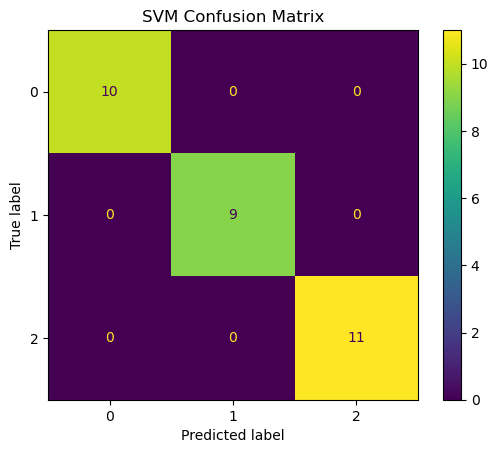

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Labels (Setosa, Versicolor, Virginica)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (SVM performs better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM with RBF kernel (nonlinear decision boundaries)
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')  # C controls margin, gamma defines decision boundary complexity
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy)

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()


using RBF kernel here to handle non linearly seperable data



0-setosa

1-versicolor

2-virginica

# SVM MODEL using pca to transform data from 4d to 2d ( using rbf kernel )

SVM Accuracy after PCA: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.88      0.78      0.82         9
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



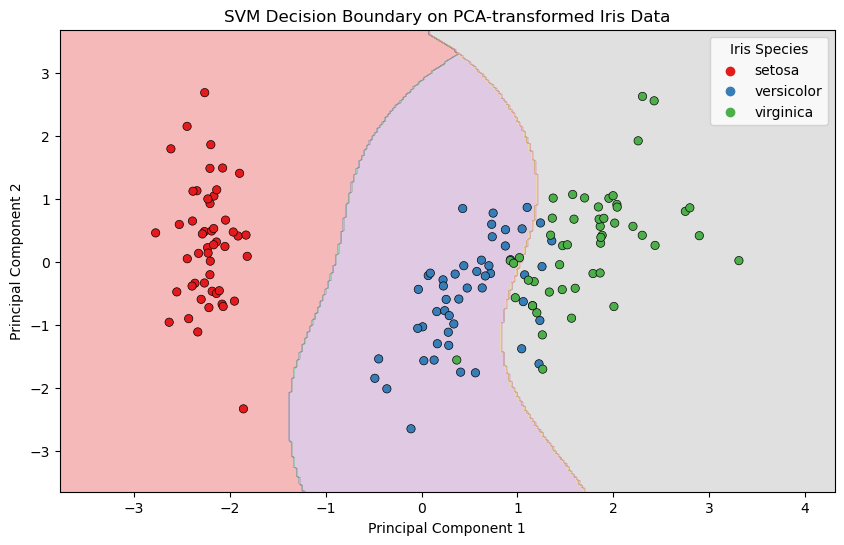

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Standardize the features (SVM performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce features from 4D to 2D
pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM with RBF kernel
model = svm.SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy after PCA:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette="Set1", edgecolor="k")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary on PCA-transformed Iris Data")
plt.legend(title="Iris Species")
plt.show()


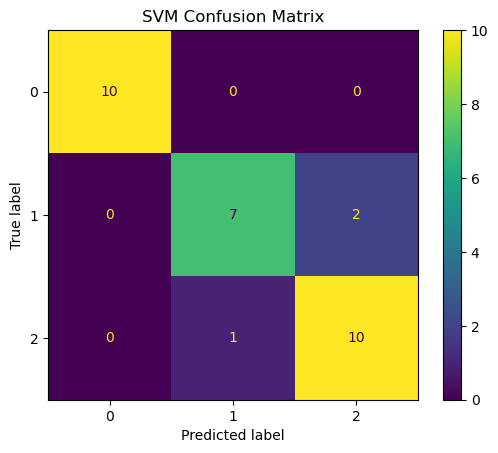

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()


# SVM MODEL using pca to transform data from 4d to 2d ( using polynomial kernel )

SVM Accuracy after PCA (Polynomial Kernel): 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



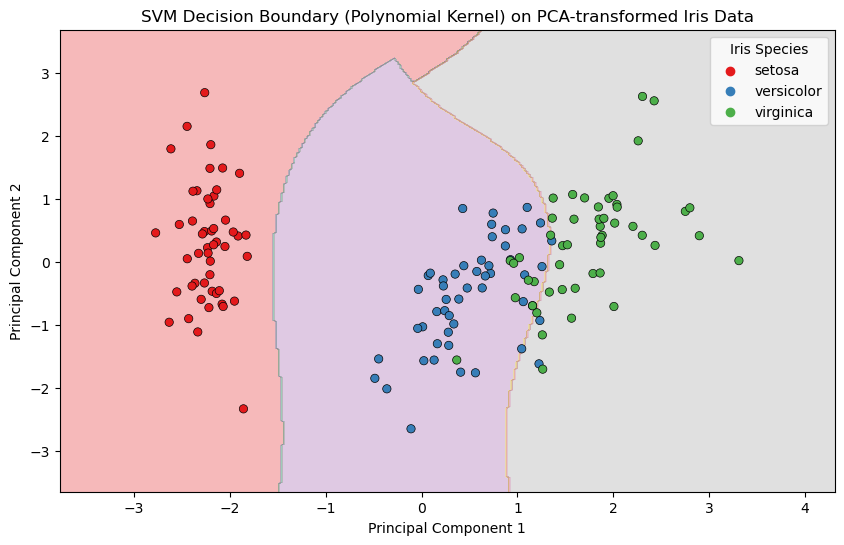

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Standardize the features (SVM performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce features from 4D to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM with Polynomial Kernel
model = svm.SVC(kernel='poly', degree=3, C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy after PCA (Polynomial Kernel):", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette="Set1", edgecolor="k")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary (Polynomial Kernel) on PCA-transformed Iris Data")
plt.legend(title="Iris Species")
plt.show()


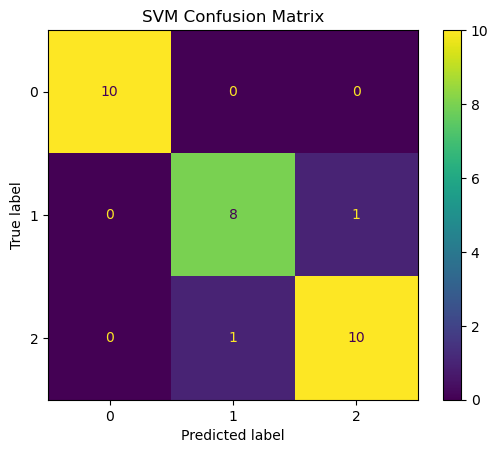

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()


# SVM MODEL using pca to transform data from 4d to 2d ( using sigmoid kernel )


SVM Accuracy after PCA (Sigmoid Kernel): 0.8666666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.67      0.75         9
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30



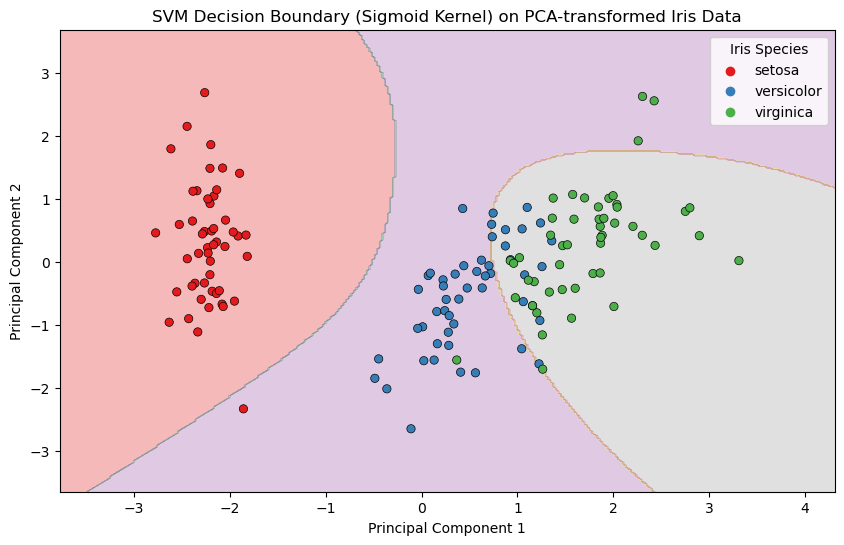

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Standardize the features (SVM performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce features from 4D to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the PCA-transformed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM with Sigmoid Kernel
model = svm.SVC(kernel='sigmoid', C=1.0, gamma='scale')
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy after PCA (Sigmoid Kernel):", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Create a mesh grid for decision boundary visualization
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Predict for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=iris.target_names[y], palette="Set1", edgecolor="k")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("SVM Decision Boundary (Sigmoid Kernel) on PCA-transformed Iris Data")
plt.legend(title="Iris Species")
plt.show()


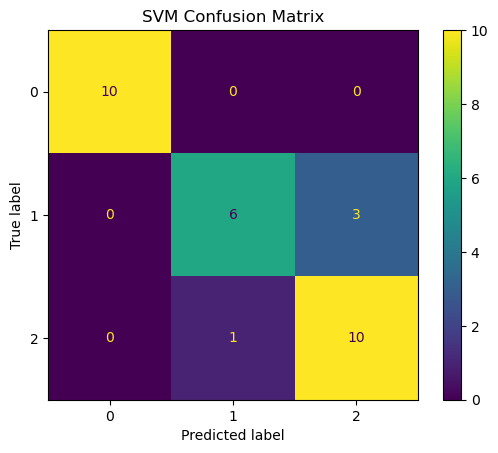

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.title("SVM Confusion Matrix")
plt.show()


SVM Kernel: linear | Mean Accuracy: 0.9667
SVM Kernel: poly | Mean Accuracy: 0.9267
SVM Kernel: rbf | Mean Accuracy: 0.9667
SVM Kernel: sigmoid | Mean Accuracy: 0.9000


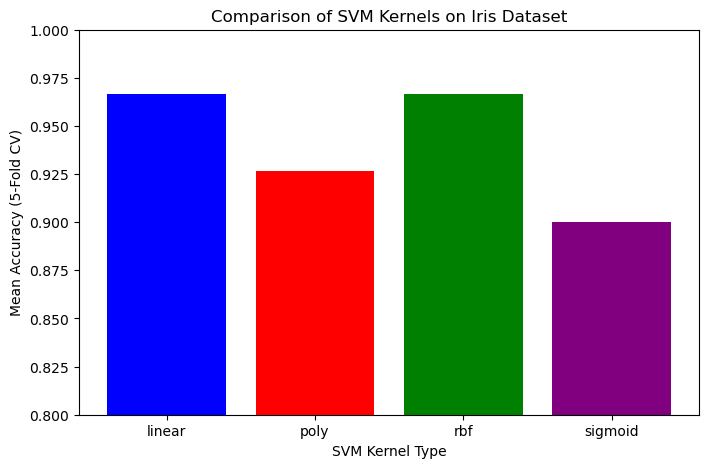

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Use all 4 features
y = iris.target  # Labels (0 = Setosa, 1 = Versicolor, 2 = Virginica)

# Standardize the features (SVM performs better with scaled data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define different SVM kernels to test
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
scores = {}

# Perform cross-validation for each kernel
for kernel in kernels:
    model = svm.SVC(kernel=kernel, C=1.0, gamma='scale', degree=3)
    cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation
    scores[kernel] = np.mean(cv_scores)
    print(f"SVM Kernel: {kernel} | Mean Accuracy: {scores[kernel]:.4f}")

# Plot the results
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['blue', 'red', 'green', 'purple'])
plt.xlabel("SVM Kernel Type")
plt.ylabel("Mean Accuracy (5-Fold CV)")
plt.title("Comparison of SVM Kernels on Iris Dataset")
plt.ylim(0.8, 1.0)  # Set y-axis limit for better visualization
plt.show()
